In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
import numpy as np

In [5]:
# Load the data
df = pd.read_csv('../Review CSVs/reviews_376210.csv')

In [6]:
# Convert timestamp_created to datetime
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])
df

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,language,review,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,timestamp_created_mst,timestamp_updated_mst
0,171044030,76561199589781036,0,1,3998,3626,3756.0,2024-07-29 21:48:26,english,very good graphics you can really tell how mut...,...,True,0,0,0.000000,0,True,False,True,2024-07-29 11:57:47 MDT,2024-07-29 11:57:47 MDT
1,171043809,76561199026918781,47,9,2505,82,2428.0,2024-07-29 19:12:38,english,monkey see monkey eat,...,True,0,0,0.000000,0,True,False,True,2024-07-29 11:53:55 MDT,2024-07-29 11:53:55 MDT
2,171037790,76561199229236722,0,10,632,632,486.0,2024-07-29 20:54:42,english,irs fun to play with friends and alone.The gam...,...,True,0,0,0.000000,0,True,False,True,2024-07-29 10:10:42 MDT,2024-07-29 10:10:42 MDT
3,171031368,76561199241838952,0,2,1602,947,1333.0,2024-07-29 19:58:06,english,I LOVE THE CROC,...,True,1,0,0.000000,0,True,False,True,2024-07-29 08:23:01 MDT,2024-07-29 08:23:01 MDT
4,171019680,76561198063623014,0,1,38445,68,38445.0,2024-07-29 09:55:45,english,Let me start off by saying this game WAS amazi...,...,False,0,0,0.000000,0,True,False,True,2024-07-29 04:34:05 MDT,2024-07-29 04:34:05 MDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,19437057,76561198053422627,2423,1271,75,0,75.0,2015-12-02 20:12:10,english,SERIOUS GAME FANS.. AVOID THIS AT ALL COSTS! ...,...,False,66,11,0.425526,38,True,False,True,2015-12-02 06:52:40 MST,2015-12-02 20:40:48 MST
46945,19432324,76561197998236248,722,3,33045,0,182.0,2024-02-03 16:27:54,english,"Gameplay: Okay, so the gameplay here is what y...",...,True,191,19,0.844195,10,False,False,True,2015-12-02 01:00:00 MST,2015-12-02 14:30:55 MST
46946,19431683,76561198031960795,269,9,1462,0,526.0,2019-06-22 22:29:40,english,"I'll keep it short, for now. Just like the gam...",...,True,28,5,0.571835,0,True,False,True,2015-12-02 00:06:21 MST,2015-12-02 00:06:21 MST
46947,19431250,76561198218298812,0,6,24902,0,102.0,2020-12-06 18:49:02,english,Needs allot of work to it but still good graph...,...,True,17,4,0.483936,0,True,False,True,2015-12-01 23:24:11 MST,2015-12-01 23:24:11 MST


In [7]:
# Filter data from January 2019 to June 2024
start_date = '2019-01-01'
end_date = '2024-06-30'
df_filtered = df[(df['timestamp_created'] >= start_date) & (df['timestamp_created'] <= end_date)]

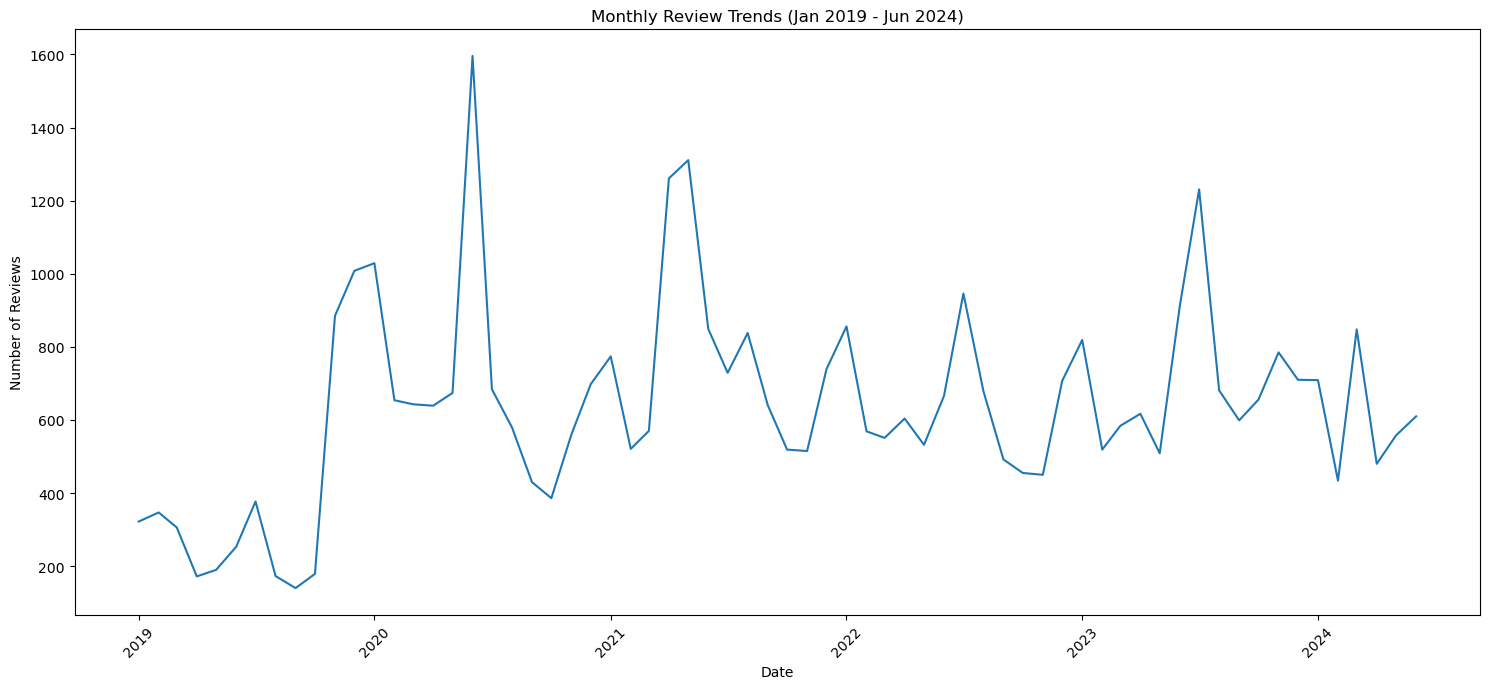

In [8]:
# 1. Monthly Review Trends

"""
This visualization shows the ebb and flow of review activity over time. 
It's like taking the pulse of the game's community engagement.

- Spikes might indicate major updates, sales, or viral moments.
- Troughs could suggest periods of lower player interest or game issues.
- The overall trend can reveal if the game is gaining or losing momentum.

"""

monthly_reviews = df_filtered.groupby(df_filtered['timestamp_created'].dt.to_period("M")).size().reset_index(name='count')
monthly_reviews['timestamp_created'] = monthly_reviews['timestamp_created'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(monthly_reviews['timestamp_created'], monthly_reviews['count'])
plt.title('Monthly Review Trends (Jan 2019 - Jun 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

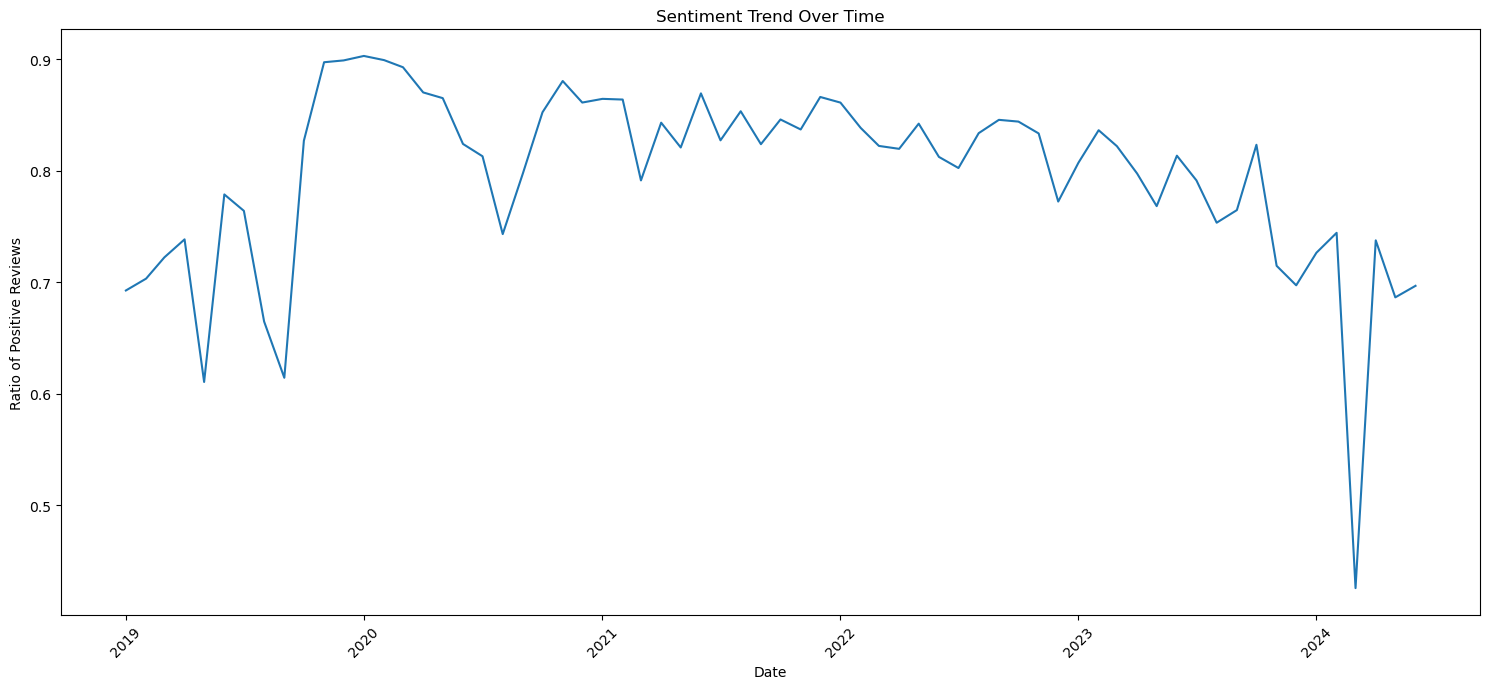

In [9]:
# 2. Sentiment Analysis Over Time

"""
Here we're tracking the emotional journey of players with the game.
Think of it as the game's approval rating over its lifetime.

- Upward trends suggest improvements or positive updates.
- Downward trends might indicate issues or unpopular changes.
- Stability could mean consistent quality or stagnation.

"""

df_filtered = df_filtered.copy()  # Create an explicit copy
df_filtered.loc[:, 'month'] = df_filtered['timestamp_created'].dt.to_period('M')
sentiment_over_time = df_filtered.groupby('month').agg({'voted_up': 'mean'}).reset_index()
sentiment_over_time['month'] = sentiment_over_time['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(sentiment_over_time['month'], sentiment_over_time['voted_up'])
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio of Positive Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

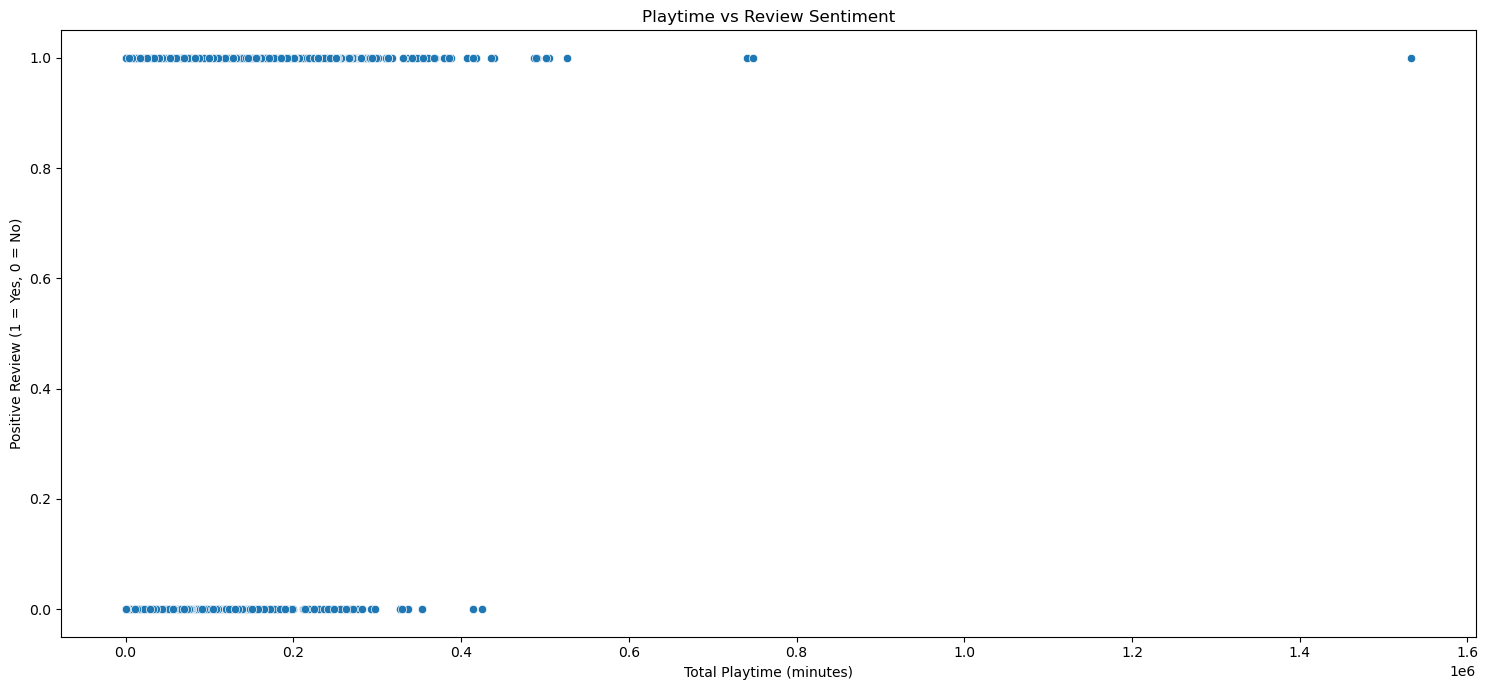

In [10]:
# 3. Playtime vs Review Sentiment

"""
This shows the relationship between how long people play and how they feel about it.

- Clusters in the top-right are your die-hard fans: long playtime and positive reviews.
- Bottom-left clusters might be disappointed players or those who couldn't get into the game.
- Outliers tell interesting stories: loved it but barely played, or played forever but didn't like it?

"""

plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_filtered, x='author_playtime_forever', y='voted_up')
plt.title('Playtime vs Review Sentiment')
plt.xlabel('Total Playtime (minutes)')
plt.ylabel('Positive Review (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()

Review Length Statistics:
count    41814.000000
mean       209.101521
std        497.826898
min          1.000000
25%         15.000000
50%         56.000000
75%        180.000000
max       7994.000000
Name: review_length, dtype: float64

Unique review lengths:
review_length
1.0        596
2.0        404
3.0       1097
4.0       1271
5.0        536
          ... 
7980.0       1
7986.0       1
7989.0       1
7990.0       1
7994.0       1
Name: count, Length: 2181, dtype: int64

Number of non-positive review lengths: 0


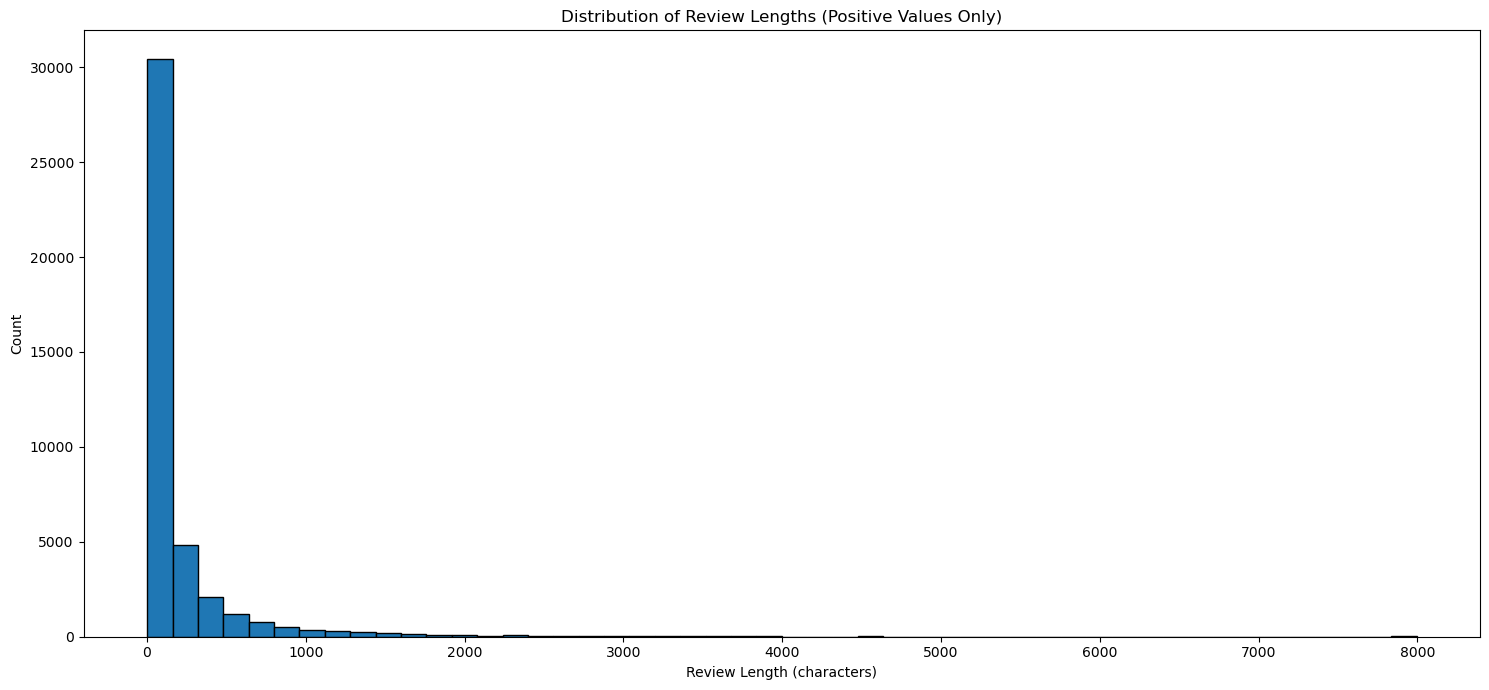

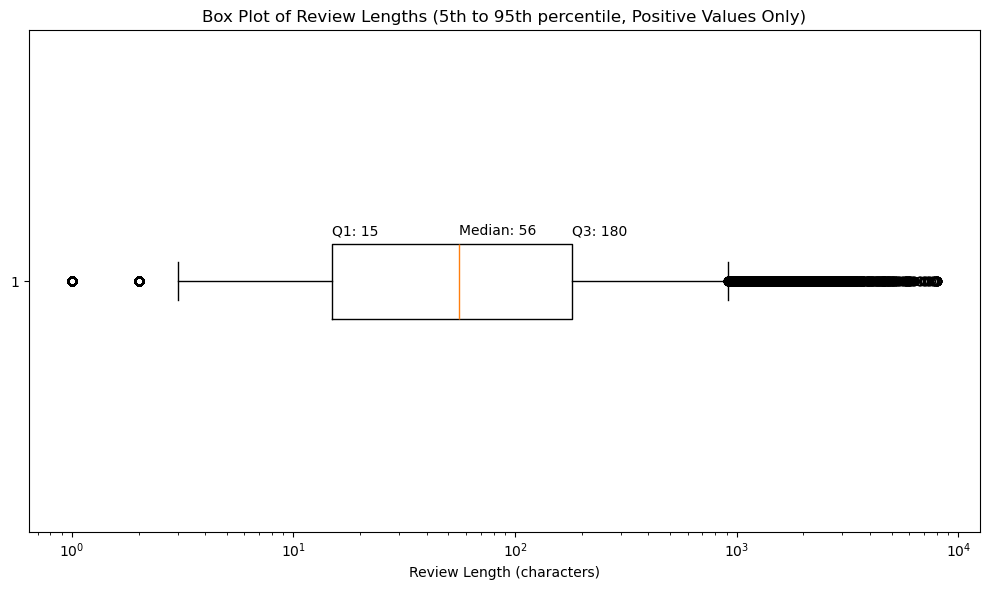


Review Length Percentiles (Positive Values Only):
5th percentile: 3 characters
25th percentile: 15 characters
50th percentile: 56 characters
75th percentile: 180 characters
95th percentile: 910 characters

Correlation between review length and positive sentiment: -0.26


In [11]:
# 4. Review Length Analysis

"""
This histogram shows how verbose (or concise) your reviewers tend to be.

- A peak at lower lengths might indicate quick, emotional responses.
- Longer reviews could suggest more thoughtful, detailed feedback.
- The shape of the distribution can tell you about your reviewers' habits.

"""

df_filtered.loc[:, 'review_length'] = df_filtered['review'].str.len()

# Data validation
print("Review Length Statistics:")
print(df_filtered['review_length'].describe())

print("\nUnique review lengths:")
print(df_filtered['review_length'].value_counts().sort_index())

# Check for non-positive values
non_positive = df_filtered[df_filtered['review_length'] <= 0]
print(f"\nNumber of non-positive review lengths: {len(non_positive)}")

if len(non_positive) > 0:
    print("Sample of reviews with non-positive lengths:")
    print(non_positive[['review', 'review_length']].head())

# Proceed with visualization only if we have positive values
positive_lengths = df_filtered[df_filtered['review_length'] > 0]['review_length']

if len(positive_lengths) > 0:
    # Histogram
    plt.figure(figsize=(15, 7))
    plt.hist(positive_lengths, bins=50, edgecolor='black')
    plt.title('Distribution of Review Lengths (Positive Values Only)')
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    bp = plt.boxplot(positive_lengths, vert=False, whis=[5, 95])
    plt.title('Box Plot of Review Lengths (5th to 95th percentile, Positive Values Only)')
    plt.xlabel('Review Length (characters)')
    plt.xscale('log')  # Use log scale for x-axis

    # Add labels for quartiles
    quartiles = positive_lengths.quantile([0.25, 0.5, 0.75])
    for i, q in enumerate(['Q1', 'Median', 'Q3']):
        plt.text(quartiles.iloc[i], 1.1, f'{q}: {quartiles.iloc[i]:.0f}', 
                 verticalalignment='center')

    plt.tight_layout()
    plt.show()

    # Print additional percentiles for context
    percentiles = positive_lengths.quantile([0.05, 0.25, 0.5, 0.75, 0.95])
    print("\nReview Length Percentiles (Positive Values Only):")
    for p, v in percentiles.items():
        print(f"{p*100:.0f}th percentile: {v:.0f} characters")

    # Correlation between review length and sentiment
    correlation = positive_lengths.corr(df_filtered.loc[positive_lengths.index, 'voted_up'])
    print(f"\nCorrelation between review length and positive sentiment: {correlation:.2f}")
else:
    print("No positive review lengths found. Cannot create visualizations.")

# If we have non-positive values, let's investigate further
if len(non_positive) > 0:
    print("\nAnalysis of non-positive review lengths:")
    print(non_positive['review_length'].value_counts().sort_index())
    print("\nSample of reviews with non-positive lengths:")
    print(non_positive[['review', 'review_length']].head())

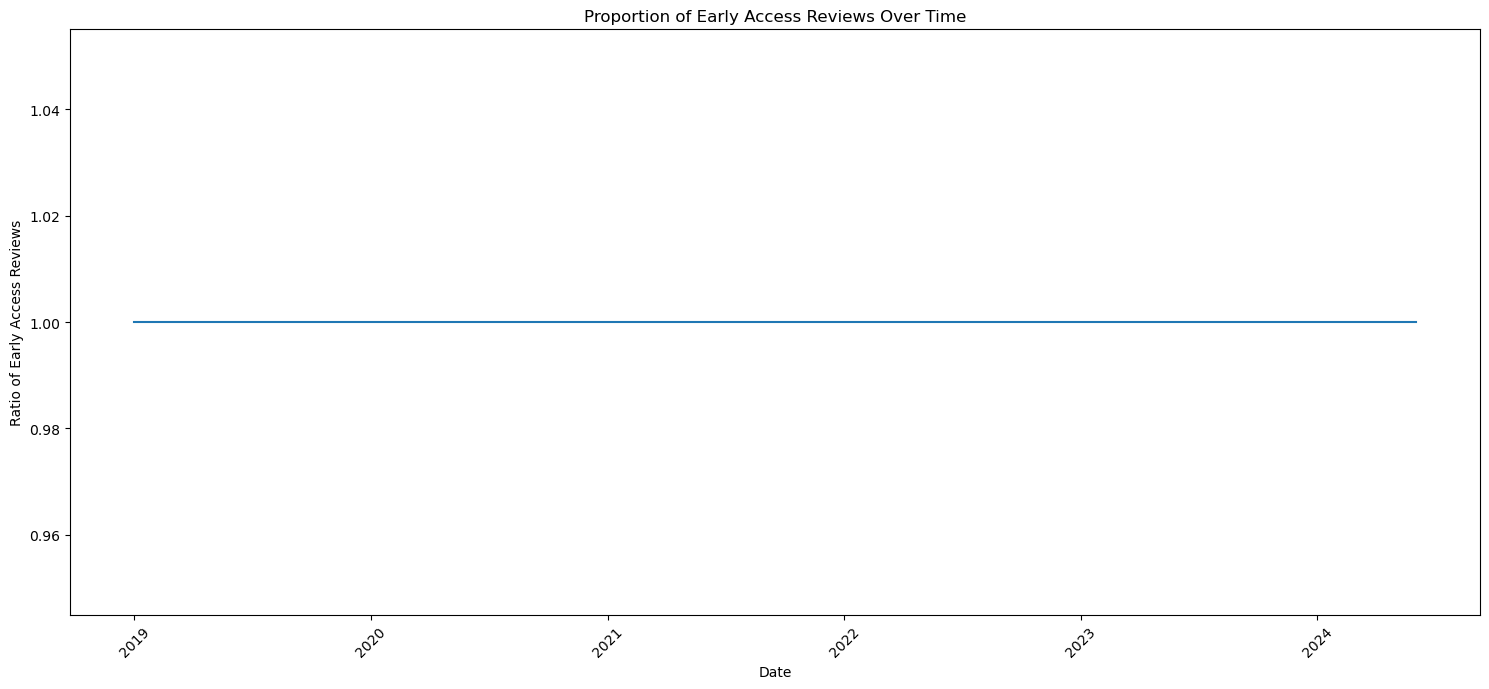

In [12]:
# 5. Early Access Impact

"""
This chart shows how the Early Access phase influenced player opinions over time.

- High early proportions show initial early adopter enthusiasm.
- The trend downwards indicates the transition to full release.
- Post-release blips might suggest nostalgia or comparisons to the early days.

"""

early_access_trend = df_filtered.groupby('month').agg({'written_during_early_access': 'mean'}).reset_index()
early_access_trend['month'] = early_access_trend['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(early_access_trend['month'], early_access_trend['written_during_early_access'])
plt.title('Proportion of Early Access Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio of Early Access Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

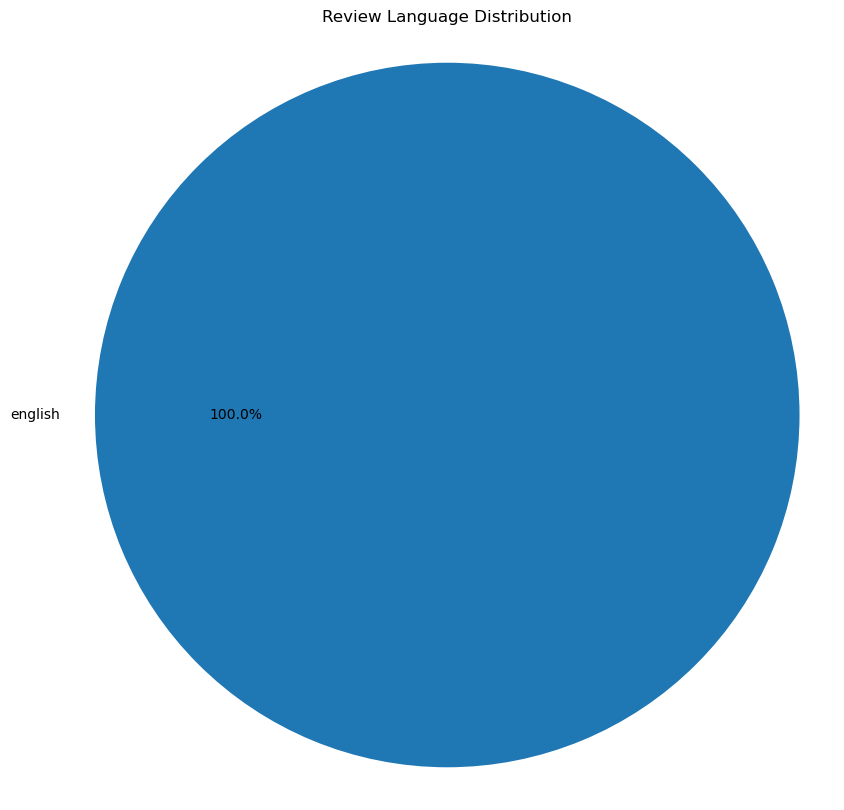

In [13]:
# 6. Language Distribution

"""
This pie chart shows the global linguistic reach and cultural impact of your game.

- Dominant languages indicate your primary markets.
- Diverse small slices suggest a global cult following.
- Unexpected languages might reveal surprising new markets.

"""

language_dist = df_filtered['language'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(language_dist.values, labels=language_dist.index, autopct='%1.1f%%')
plt.title('Review Language Distribution')
plt.axis('equal')
plt.show()

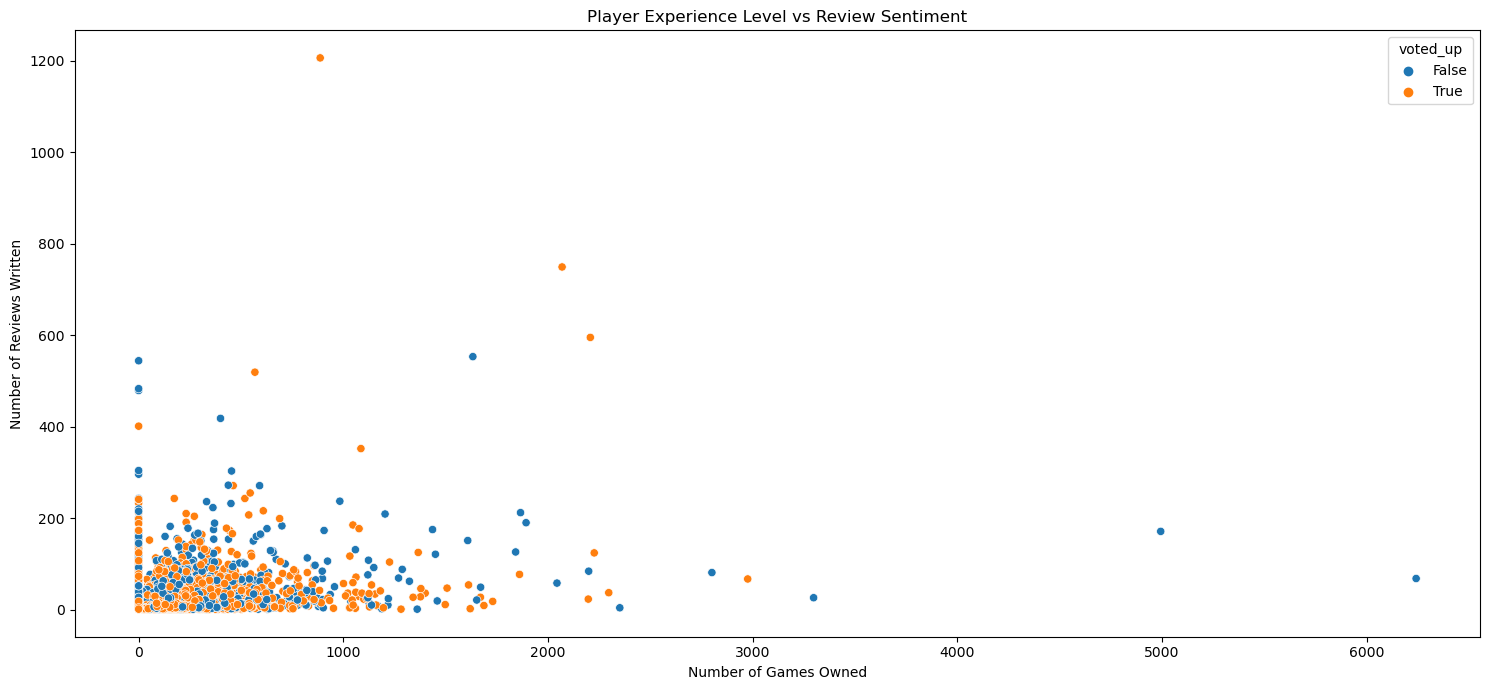

In [14]:
# 7. Player Experience Level

"""
This scatter plot is like a gamer demographic survey for the reviewers. 
It shows how experienced Steam users react to the game.

- Clusters can reveal your core audience: newbies, veterans, or a mix?
- The color distribution shows how different player types rate your game.
- Outliers might be influential reviewers or unique player experiences.

It's a way to see if the game is a hit with the Steam elite or a gateway game for newcomers!

"""

plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_filtered, x='author_num_games_owned', y='author_num_reviews', hue='voted_up')
plt.title('Player Experience Level vs Review Sentiment')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews Written')
plt.tight_layout()
plt.show()

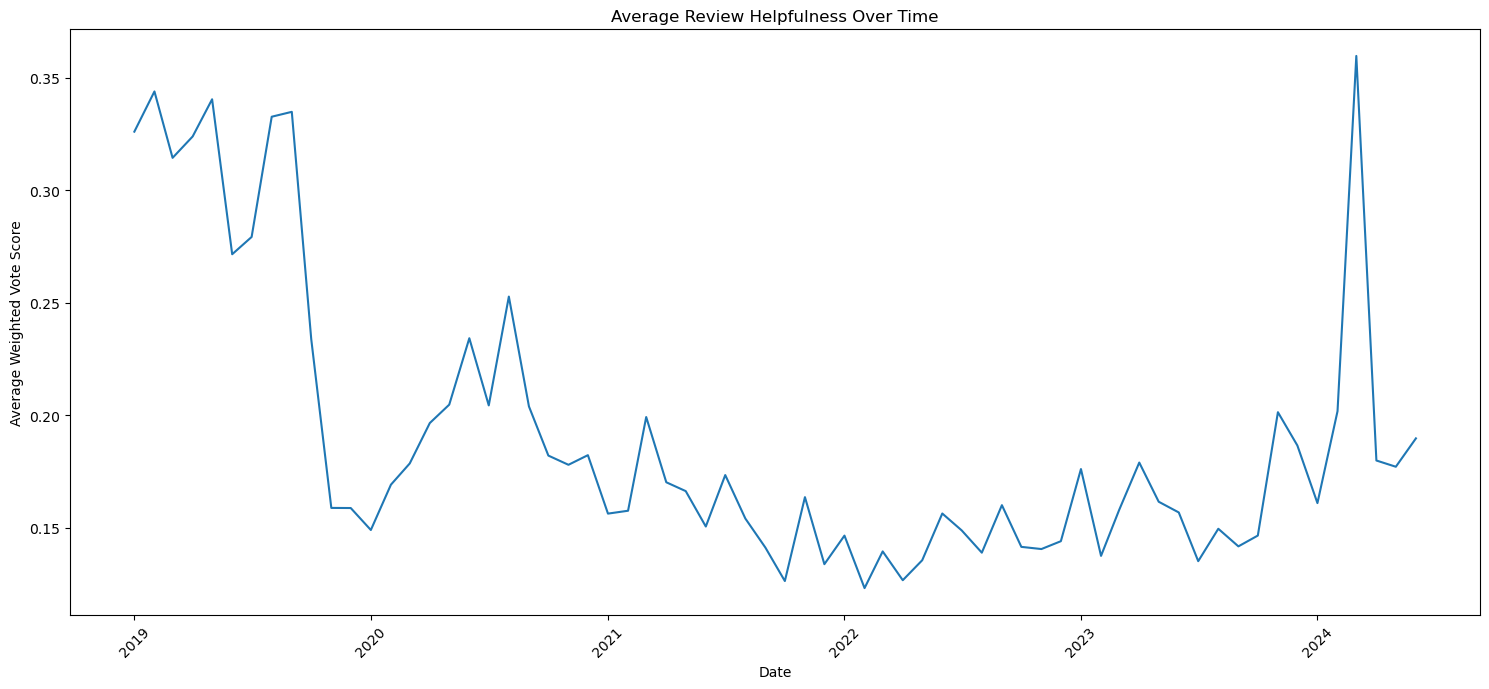

In [15]:
# 8. Review Helpfulness Over Time

"""
This trend line shows how useful other players find the reviews.

- Upward trends suggest more insightful or balanced reviews over time.
- Downward trends might indicate controversial periods or review bombing.
- Stability could mean consistent community engagement.

"""

helpfulness_over_time = df_filtered.groupby('month').agg({'weighted_vote_score': 'mean'}).reset_index()
helpfulness_over_time['month'] = helpfulness_over_time['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(helpfulness_over_time['month'], helpfulness_over_time['weighted_vote_score'])
plt.title('Average Review Helpfulness Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weighted Vote Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

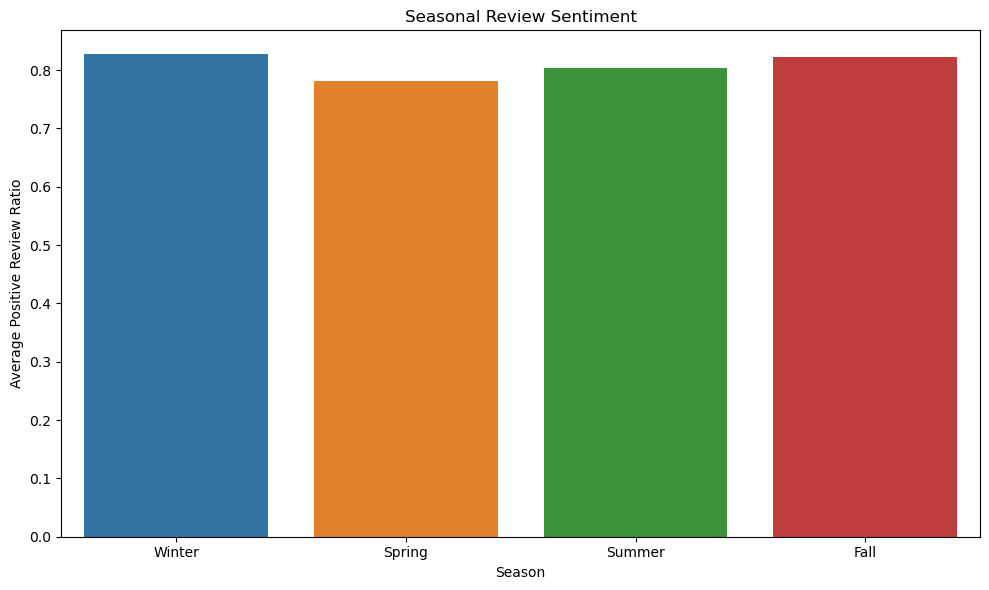

In [16]:
# 9. Seasonal Trends

"""
This bar chart shows how the time of year affects player sentiment.

- Higher bars indicate seasons when players tend to enjoy the game more.
- Lower bars might suggest seasonal challenges or competition.
- Patterns could reveal optimal times for updates or promotions.

"""

df_filtered.loc[:, 'season'] = df_filtered['timestamp_created'].dt.month.map({1:'Winter', 2:'Winter', 3:'Spring', 
                                                                              4:'Spring', 5:'Spring', 6:'Summer',
                                                                              7:'Summer', 8:'Summer', 9:'Fall',
                                                                              10:'Fall', 11:'Fall', 12:'Winter'})
seasonal_sentiment = df_filtered.groupby('season')['voted_up'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='voted_up', data=seasonal_sentiment, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Review Sentiment')
plt.xlabel('Season')
plt.ylabel('Average Positive Review Ratio')
plt.tight_layout()
plt.show()

Number of positive reviews: 33864
Number of negative reviews: 8095
Number of words in positive reviews: 916564
Number of words in negative reviews: 714670


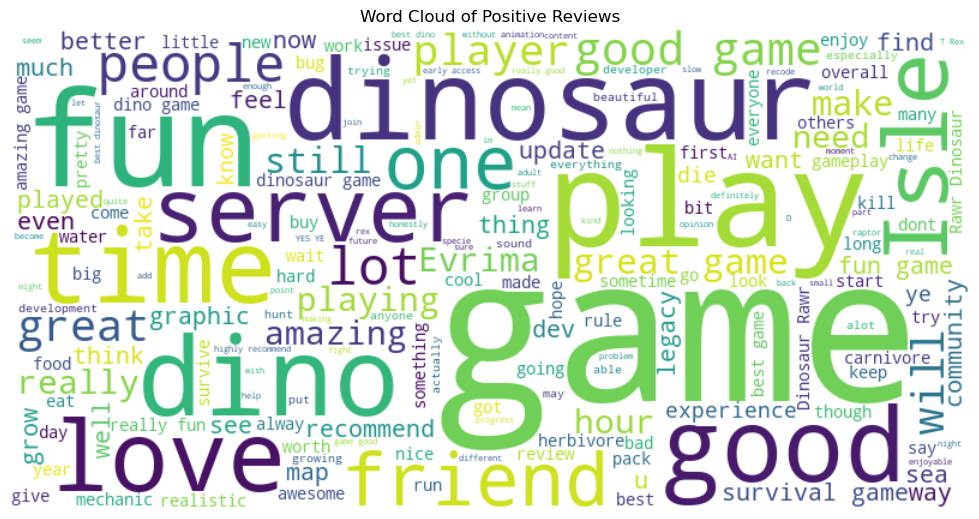

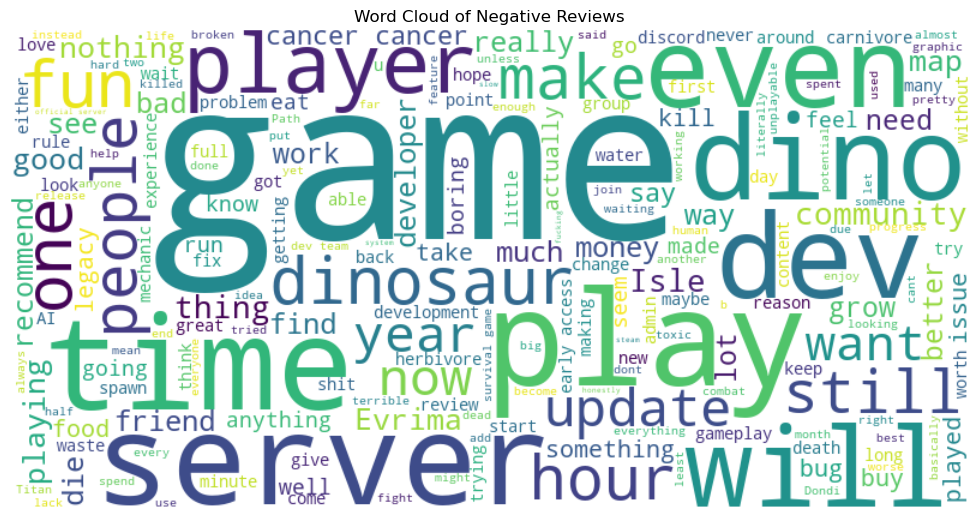


Sample positive review:
The community is great and there's a lot coming for envirma that I look forward to

Sample negative review:
It is a do nothing simulator for the cost of $20


In [17]:
# 10. Word Frequency Analysis (Word Cloud)

"""
These word clouds are like thought bubbles floating above the positive and negative reviewers. 
They visually represent the most common terms used in reviews.

- Larger words are more frequently mentioned and potentially more important.
- Positive cloud might reveal beloved features or emotions.
- Negative cloud could highlight pain points or areas for improvement.

"""


def clean_reviews(reviews):
    return ' '.join([str(review) for review in reviews if isinstance(review, str)])

positive_reviews = clean_reviews(df_filtered[df_filtered['voted_up'] == True]['review'])
negative_reviews = clean_reviews(df_filtered[df_filtered['voted_up'] == False]['review'])

def generate_wordcloud(text, title):
    if not text:
        print(f"No valid text for {title}. Skipping word cloud generation.")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

# Print some statistics about the reviews
print(f"Number of positive reviews: {len(df_filtered[df_filtered['voted_up'] == True])}")
print(f"Number of negative reviews: {len(df_filtered[df_filtered['voted_up'] == False])}")
print(f"Number of words in positive reviews: {len(positive_reviews.split())}")
print(f"Number of words in negative reviews: {len(negative_reviews.split())}")

generate_wordcloud(positive_reviews, 'Word Cloud of Positive Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud of Negative Reviews')

# Optional: Display some sample reviews
print("\nSample positive review:")
print(df_filtered[df_filtered['voted_up'] == True]['review'].iloc[0])

print("\nSample negative review:")
print(df_filtered[df_filtered['voted_up'] == False]['review'].iloc[0])